# Основные концепции Machine Learning. Домашняя работа

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [2]:
### Здесь требуется загрузить датасет phones.csv ###
df = pd.read_csv('1.8_phones.csv')

In [3]:
df.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


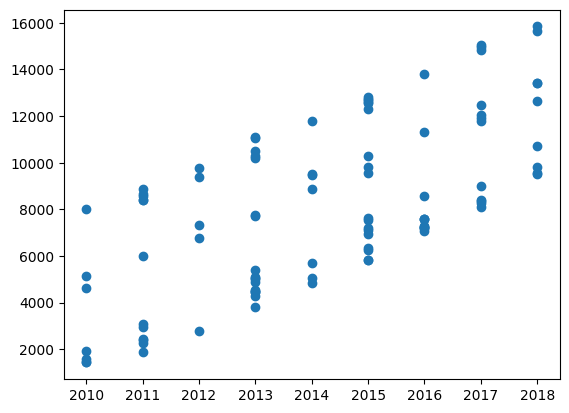

In [14]:
plt.scatter(df['year'], df['price'])
plt.show()

Задание 1: обучить модель регрессии

In [5]:
X = df['year'].values
y = df['price'].values

In [6]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression().fit(X, y)


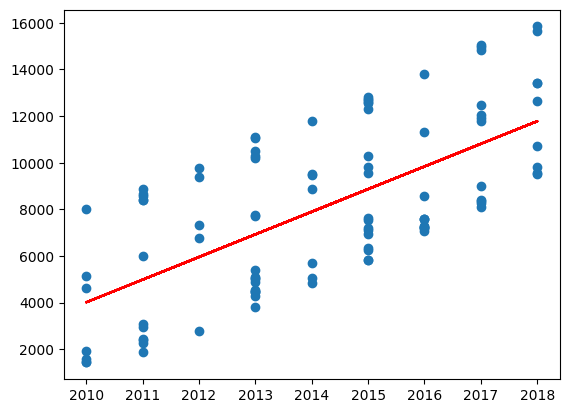

In [7]:
# Make the prediction for the years
y_pred = model.predict(X)
# Plot data and prediction
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

Задание 2: обучить модель классификации

In [8]:
# Load data for classifying os. Predict os based on year, price and disk
X = df[['year', 'price', 'disk']].values
y = df['os'].values

In [9]:
# Train the model
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

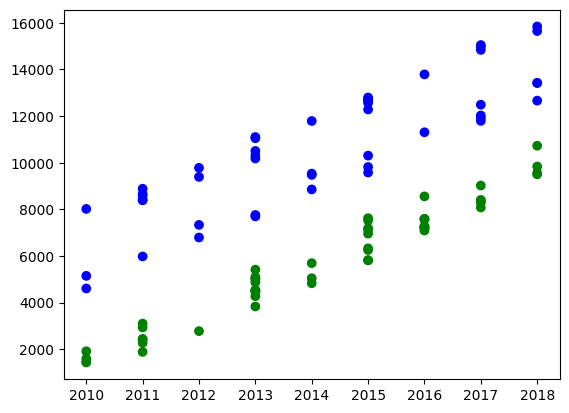

In [10]:
# Draw scaatter plot for year and price with colors for os
colors = {'Android':'green', 'iOS':'blue'}
plt.scatter(df['year'], df['price'], c=df['os'].apply(lambda x: colors[x]))

Задание 3: обучить модель кластеризации

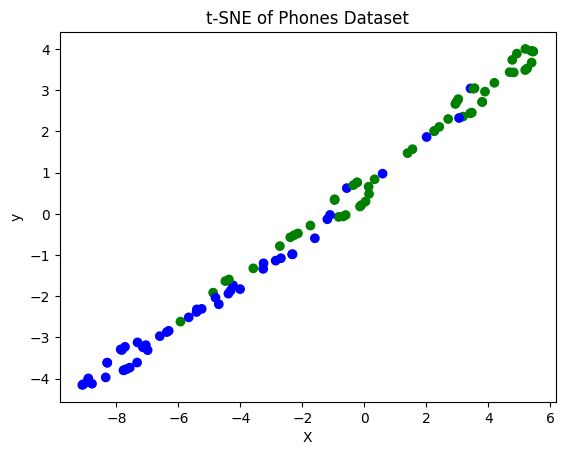

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Create a color map for the os
color_map = {'iOS': 'blue', 'Android': 'green'}

# Separate features and target
features = df[['disk', 'price', 'year']]
target = df['os']

# Apply t-SNE to make visualization
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(features)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=target.map(color_map))

plt.xlabel('X')
plt.ylabel('y')
plt.title('t-SNE of Phones Dataset')

plt.show()

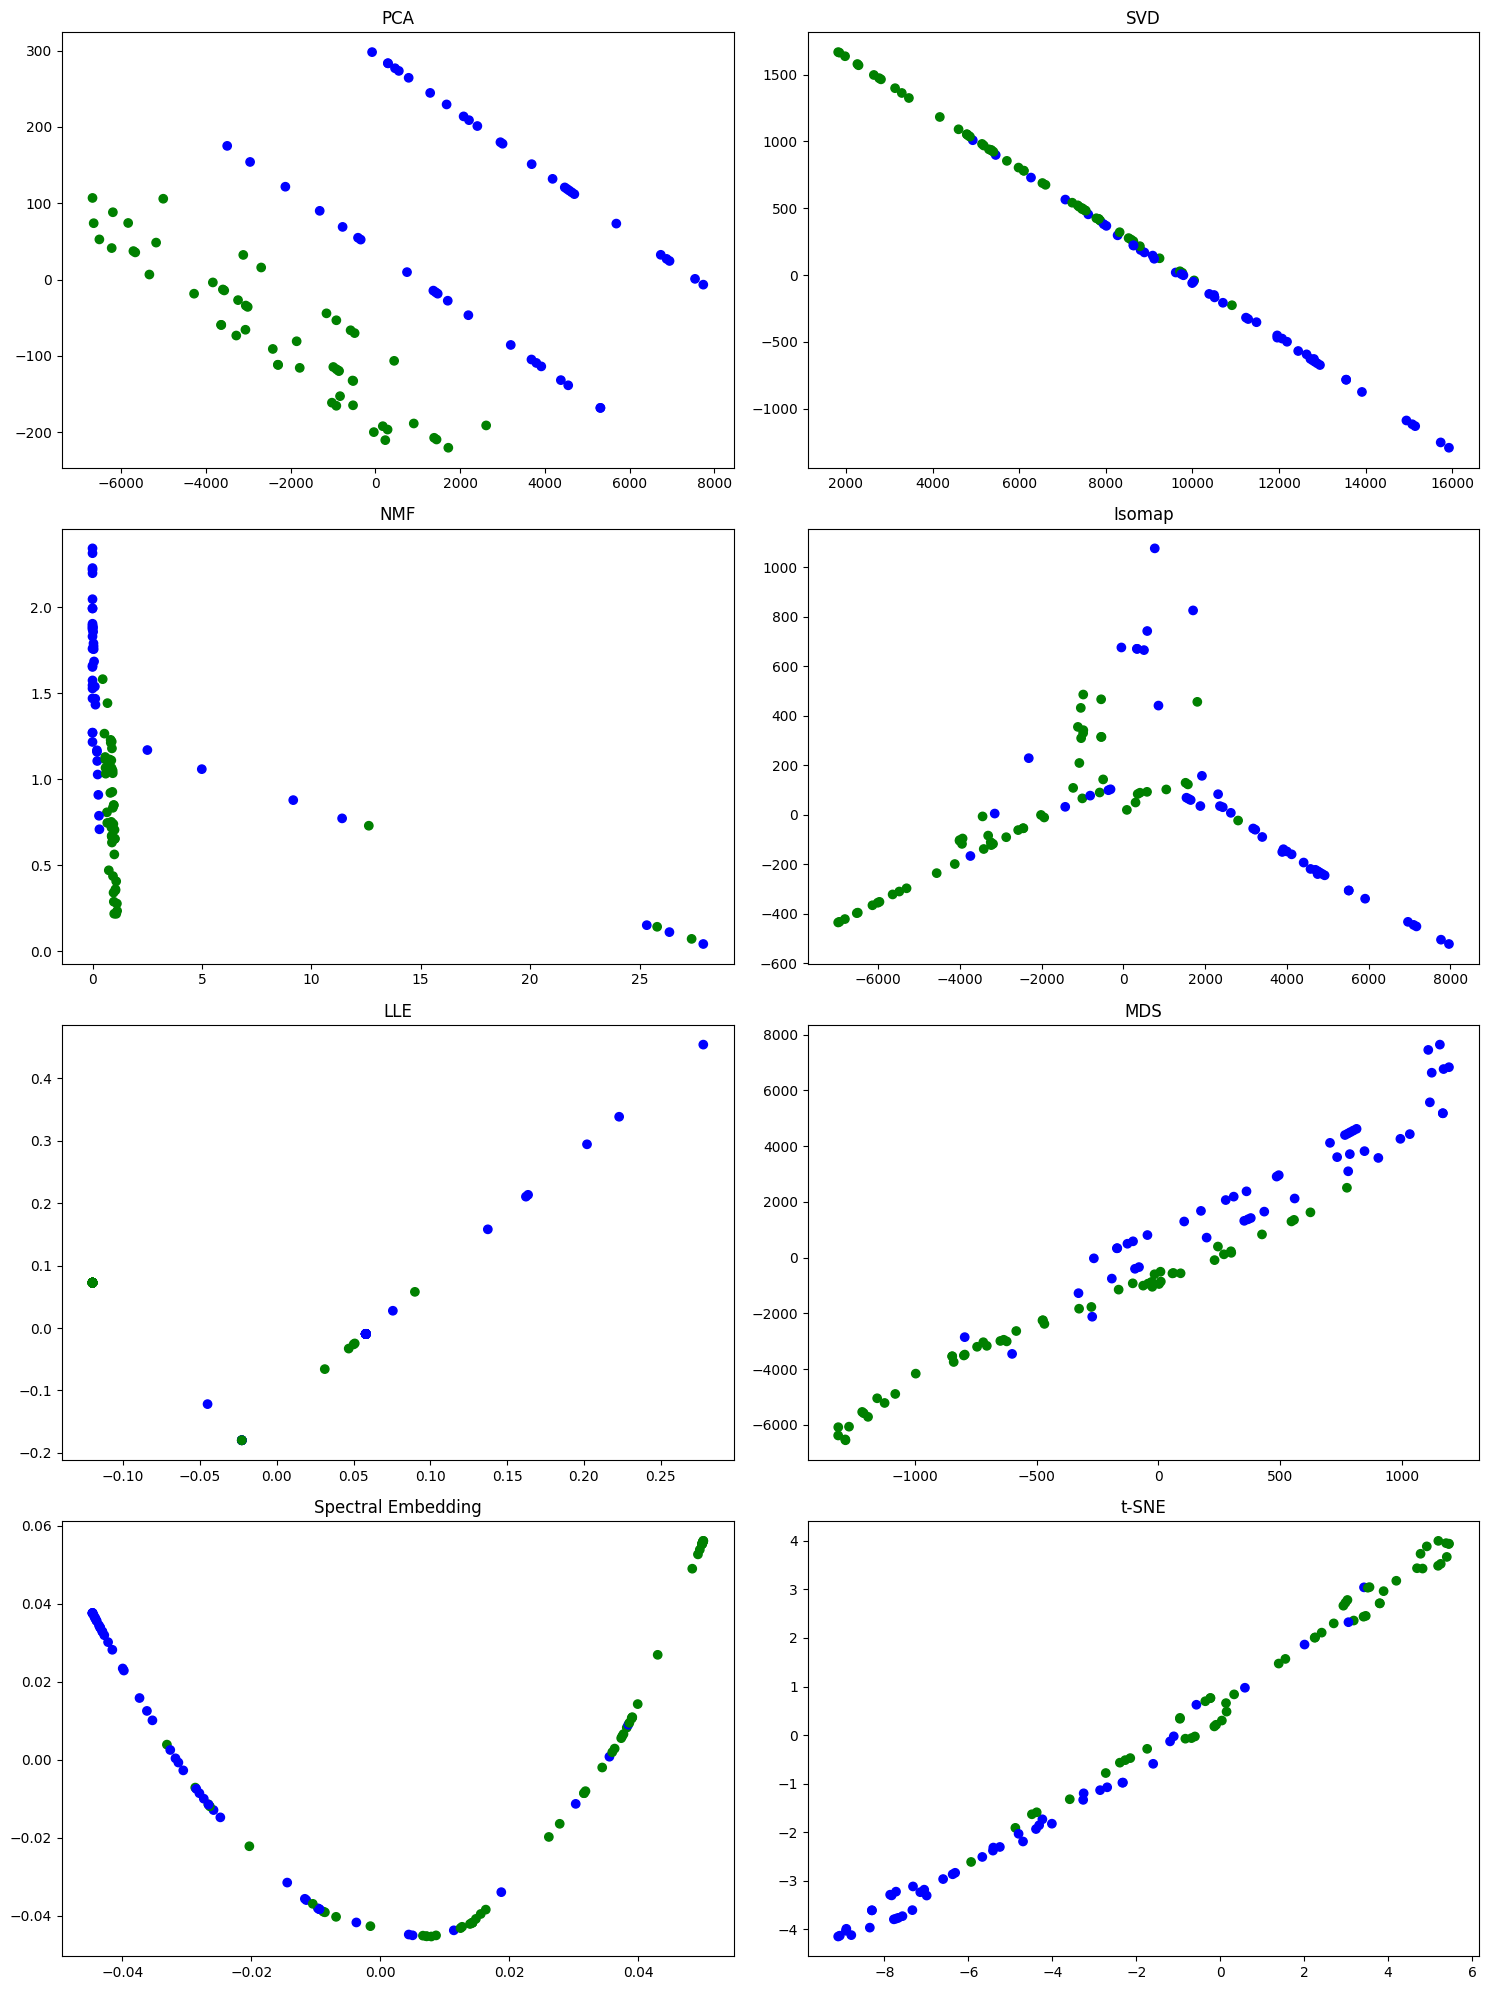

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE

# Define the dimensionality reduction methods
methods = [
    ('PCA', PCA(n_components=2)),
    ('SVD', TruncatedSVD(n_components=2)),
    ('NMF', NMF(n_components=2)),
    ('Isomap', Isomap(n_components=2)),
    ('LLE', LocallyLinearEmbedding(n_components=2)),
    ('MDS', MDS(n_components=2)),
    ('Spectral Embedding', SpectralEmbedding(n_components=2)),
    ('t-SNE', TSNE(n_components=2))
]

# Create a subplot for each method
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

for ax, (name, method) in zip(axs.flatten(), methods):
    result = method.fit_transform(features)
    ax.scatter(result[:, 0], result[:, 1], c=target.map(color_map))
    ax.set_title(name)

plt.tight_layout()
plt.show()

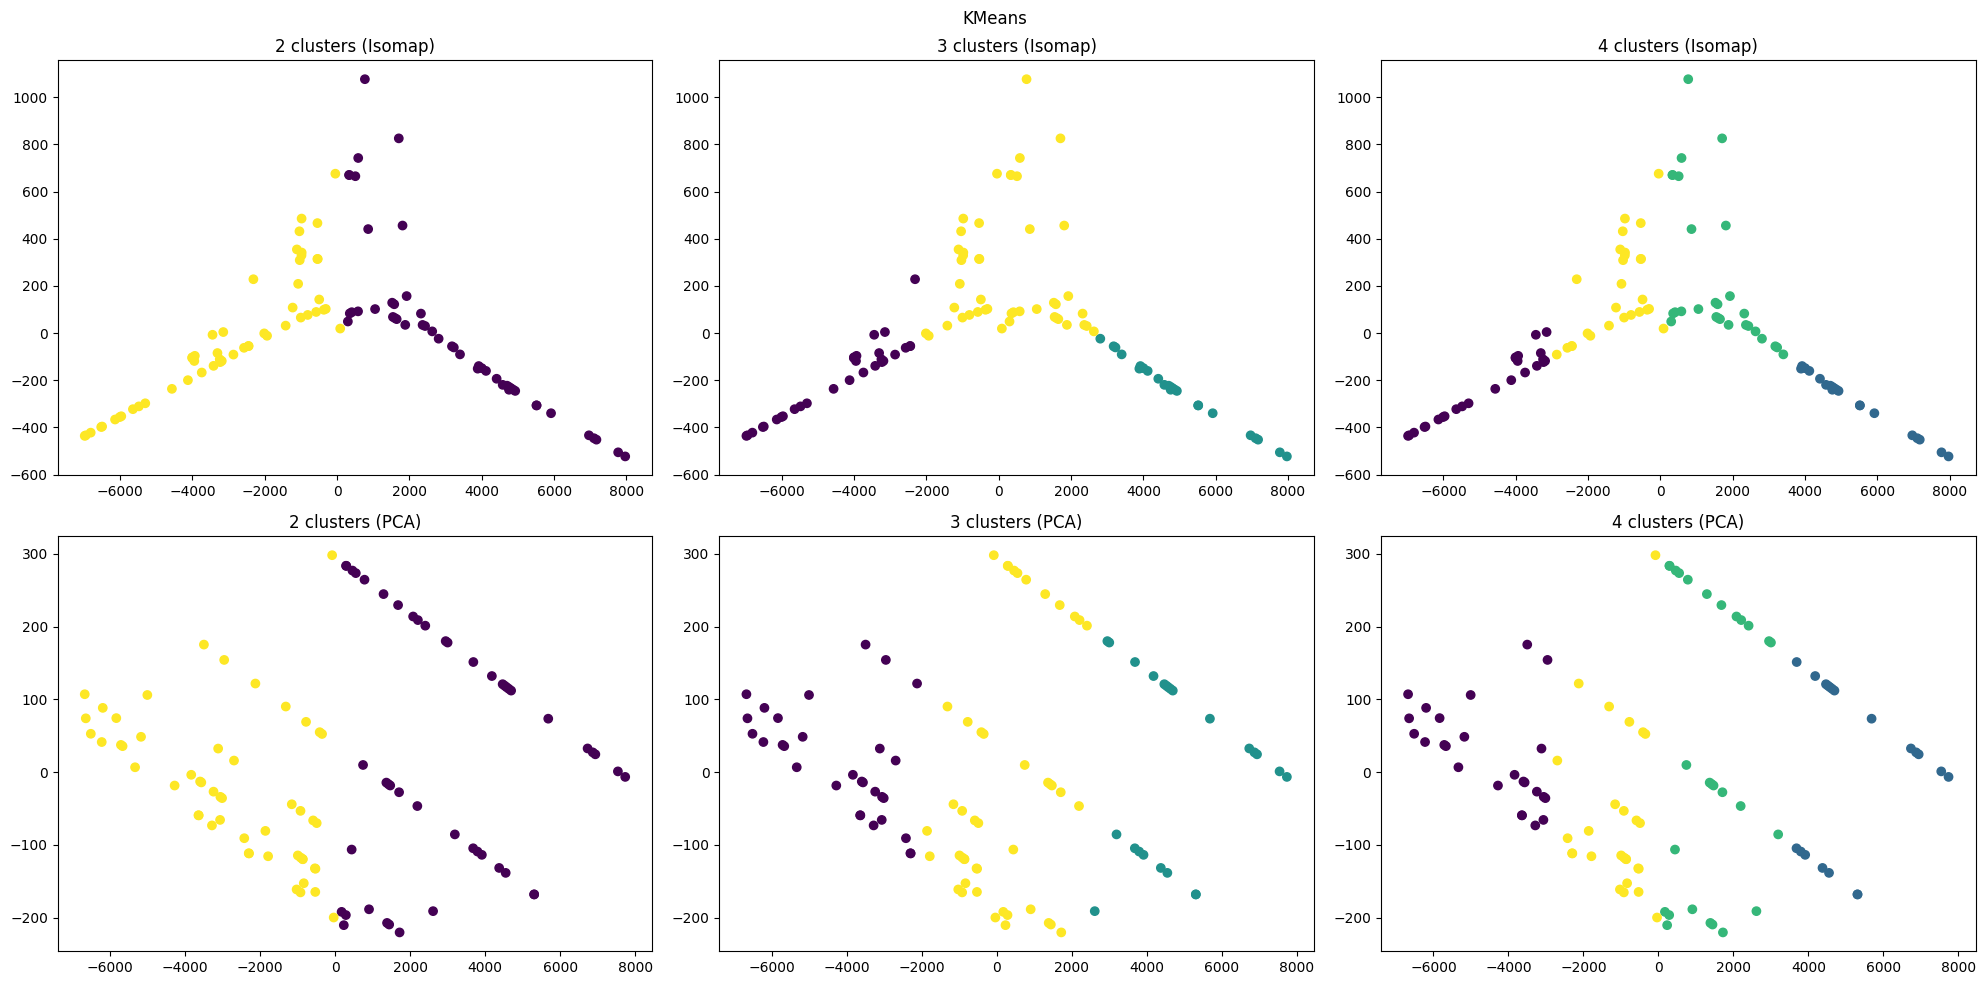

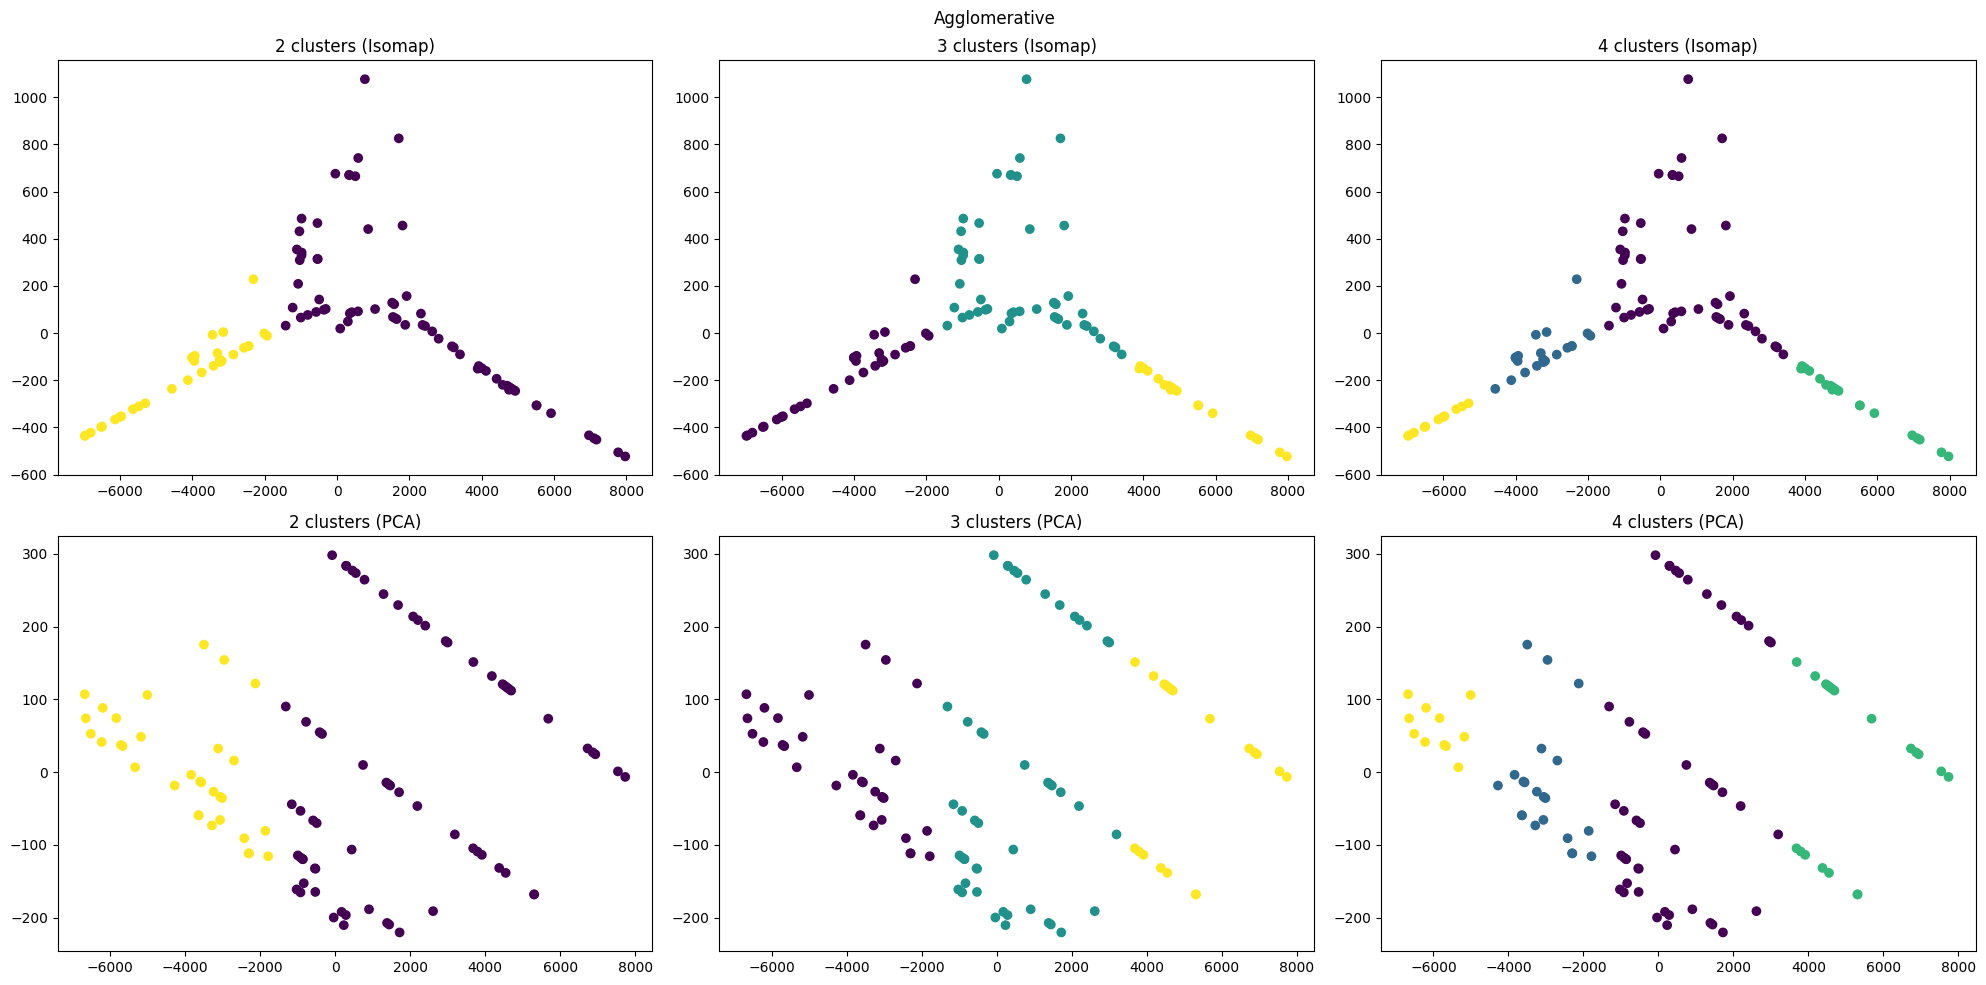

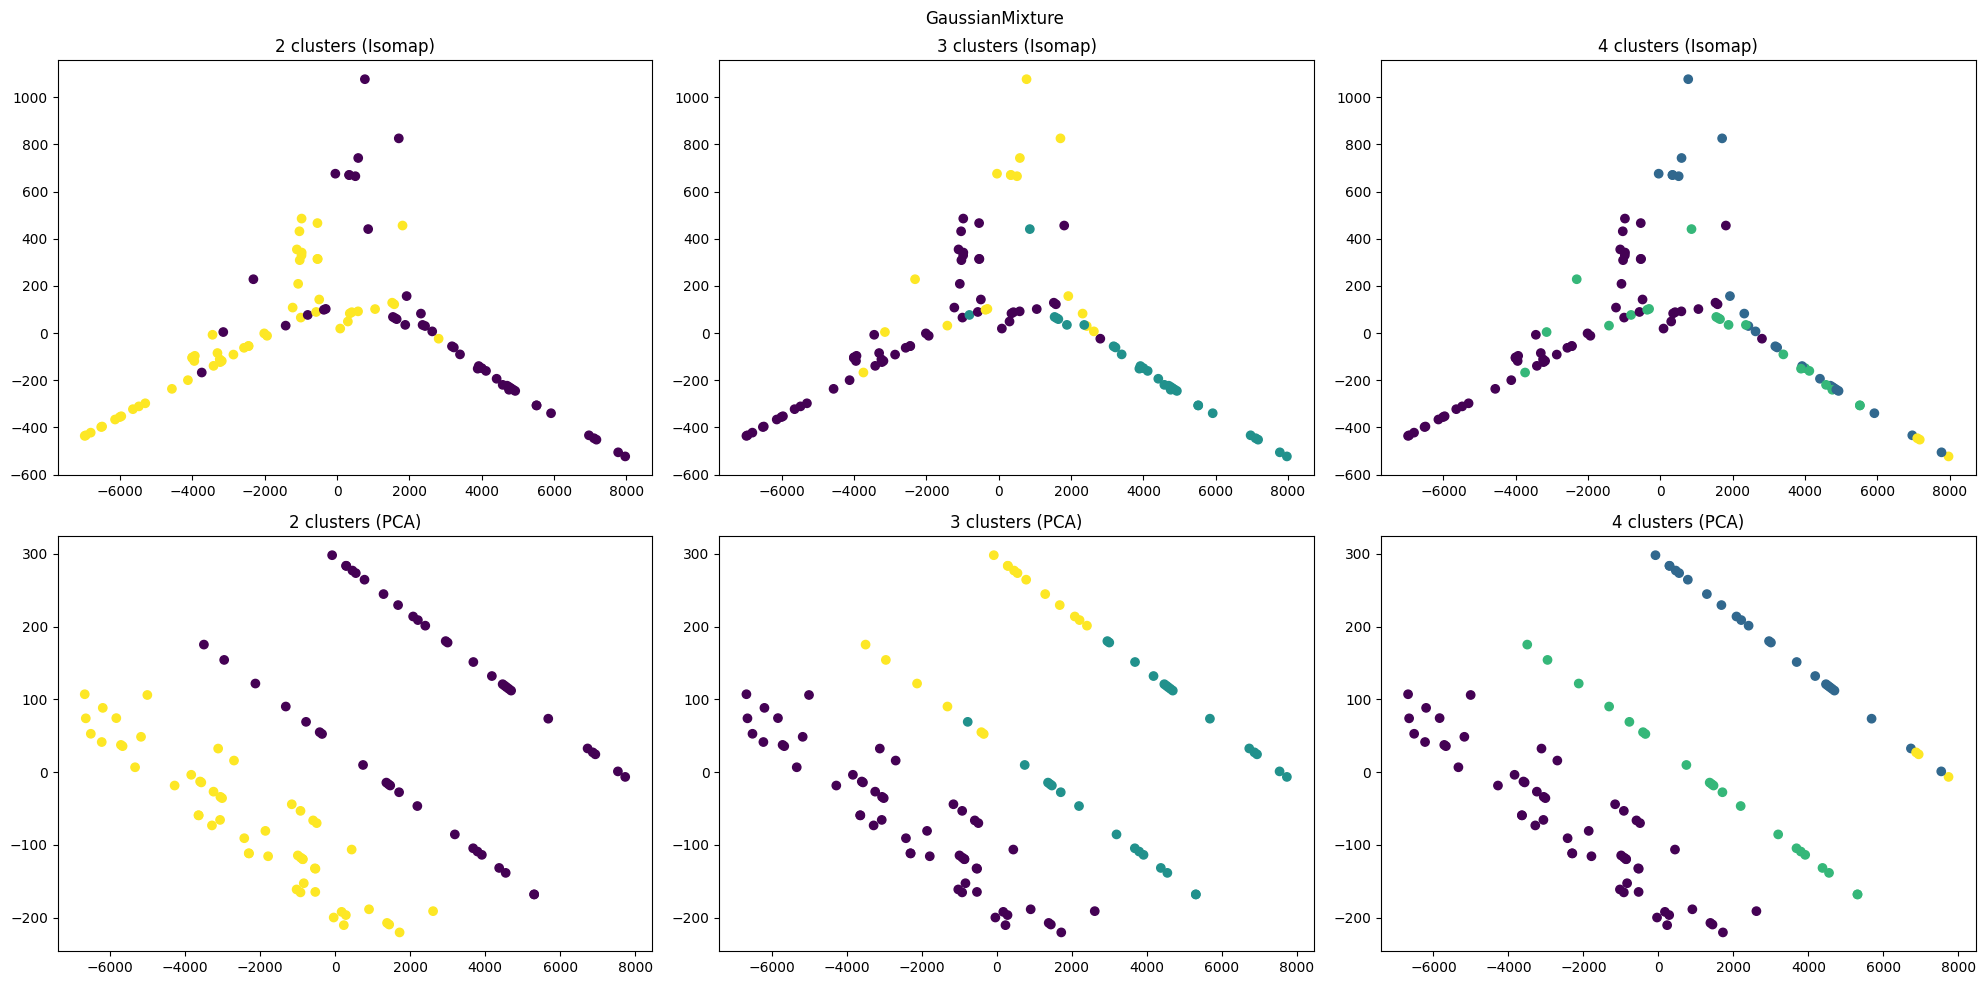

In [13]:
# Import the necessary libraries
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Define the clustering methods
methods = [
    ('KMeans', KMeans),
    ('Agglomerative', AgglomerativeClustering),
    ('GaussianMixture', GaussianMixture)
]

# Define the number of clusters
n_clusters = range(2, 5)

# Instantiate the dimensionality reduction methods
iso = Isomap(n_components=2)
pca = PCA(n_components=2)

# Loop over the methods
for name, method in methods:
    fig, axs = plt.subplots(2, len(n_clusters), figsize=(20, 10))
    fig.suptitle(name)
    
    # Loop over the number of clusters
    for i, n in enumerate(n_clusters):
        # Instantiate the model
        if name == 'GaussianMixture':
            model = method(n_components=n)
        else:
            model = method(n_clusters=n)
        
        # Fit the model and predict the clusters
        if name == 'GaussianMixture':
            clusters = model.fit(df[['disk', 'price', 'year']]).predict(df[['disk', 'price', 'year']])
        else:
            clusters = model.fit_predict(df[['disk', 'price', 'year']])
        
        # Apply Isomap to the data
        iso_result = iso.fit_transform(df[['disk', 'price', 'year']])
        
        # Apply PCA to the data
        pca_result = pca.fit_transform(df[['disk', 'price', 'year']])
        
        # Plot the clusters with Isomap
        axs[0, i].scatter(iso_result[:, 0], iso_result[:, 1], c=clusters)
        axs[0, i].set_title(f'{n} clusters (Isomap)')
        
        # Plot the clusters with PCA
        axs[1, i].scatter(pca_result[:, 0], pca_result[:, 1], c=clusters)
        axs[1, i].set_title(f'{n} clusters (PCA)')

    plt.tight_layout()
    plt.show()